# TaylorF2EccPerAdvFD1PN injection and parameters recovered with TaylorF2EccPerAdvFD1PNAmp leading order
## minimum-frequency=20Hz
## injected-parameters:
### chirp_mass = 8.264298149225912, mass_ratio = 0.819047619047619
### SNR = 41.62079657160877
### injection_parameters = dict(mass_1=10.5, mass_2=8.6, eccentricity=0.08, luminosity_distance=280., theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

### 06:48 bilby INFO    : Sampling time: 16:39:33.262048
### 06:48 bilby INFO    : Summary of results:
### nsamples: 9615
### ln_noise_evidence: -16636.856
### ln_evidence: -15946.398 +/-  0.239
### ln_bayes_factor: 690.458 +/-  0.239

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import bilby

In [2]:
result = bilby.result.read_in_result("TaylorF2EccPerAdvFD1PNLeO_recovery_result.json")

In [3]:
result.plot_corner(outdir='.')

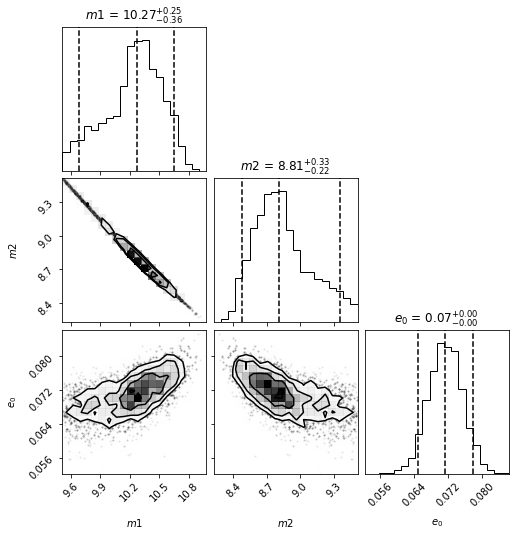

In [4]:
chirp_mass_ = result.posterior["chirp_mass"].values
mass_ratio_ =  result.posterior["mass_ratio"].values
e0 = result.posterior["eccentricity"].values

m1 = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
m2 = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)

data = np.transpose(np.array([m1, m2,e0]))
figure = corner.corner(data, labels=[r"$m1$", r"$m2$", r"$e_0$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})